# 4 Multinomial Logistic Regression

In this notebook, we will show the second model that was chosen for this dataset - Multinomial Logistic Regression.

The primary reason for selecting this machine learning model is for its capability of handling multiclass classifications, such as identifying the genres of music. Moreover, given the this machine learning model provides us an insight of how it perceives features and how it would affect the predicted probabilities of the genres for each music example.

## Libraries

Import **matplotlib**, **numpy**, and **SGDClassifier**.
pip install any missing libraries

In [1]:
from DataLoader import DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Prep
from sklearn.model_selection import train_test_split, learning_curve

#Models
from sklearn.linear_model import SGDClassifier

# Hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import make_scorer, precision_score, accuracy_score
from sklearn.metrics import log_loss

### Metric

The metric we will be using both `precision_score` and `accuracy_score`, to provide us a more balanced view of our model's performance.

Although we are more concerned about the general correctness of our model when making predictions, some accuracy values may be skewed or misleading due to potential class imbalances or errors within the dataset.

In [2]:
def get_Score(model, X_train, X_test, y_train, y_test, verbose = 1):
    
    #Retrieve the precision score of test & train via sklearn's precision_score
    precision_train = precision_score(model.predict(X_train), y_train, average=None)
    precision_test = precision_score(model.predict(X_test), y_test, average=None)
    
    #Graph the scores using the graph_Score function if verbose is set to TRUE
    if verbose:
        graph_Scores((precision_train, precision_test))
        
        print(f"Train Avg Precision : {precision_train.mean():.4f}")
        print(f"Test Avg Precision : {precision_test.mean():.4f}")
        
    return precision_train, precision_test

In [3]:
def get_Accuracy(model, X_train, X_test, y_train, y_test, verbose = 1):
    
    # Retrieve the overall accuracy score of test & train
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    overall_accuracy_train = accuracy_score(y_train, train_pred)
    overall_accuracy_test = accuracy_score(y_test, test_pred)
    
    # Print the overall accuracy scores if verbose is set to TRUE
    if verbose:       
        print(f"Train Accuracy : {overall_accuracy_train:.4f}")
        print(f"Test Accuracy : {overall_accuracy_test:.4f}")
        
    return overall_accuracy_train, overall_accuracy_test

By using `sklearn`'s `precision_score` and `accuracy_score`, we are able to retrieve score data that allows us to gauge how well our model performs.

### Graphs & Plots

To visualize how our data looks like, we will use  **matplotlib**, for bar and line graphs.


In [4]:
def graph_Scores(scores, title='', ranges = None):
    #Determines the width of each bar in the graph
    width = 0.35

    #X-axis positions for the training and test scores
    br1 = range(len(scores[0])) if ranges is None else ranges
    br2 = [x + width for x in br1] 

    #Create a histogram to visualize the precision scores for the model
    plt.bar(br1, scores[0], width=width, edgecolor='black', label='Train Score')
    plt.bar(br2, scores[1], width=width, edgecolor='black', label='Test Score')
    plt.title(title)
    plt.ylabel('Precision Score')
    plt.xlabel('Class / Genre')

    #Show integers in the x axis accordingly
    plt.xticks(np.arange(0, 11, 1))
    
    plt.legend()
    plt.show()  

In [5]:
def compare_Accuracies(accuracy1, accuracy2, labels=('Model 1', 'Model 2'), title='Accuracy Comparison'):
    #Determines the width of each bar in the graph
    width = 0.15

    # X-axis positions for the accuracies
    br1 = np.arange(2)  # Positions for accuracy1 (Model 1)
    br2 = [x + width for x in br1]  # Positions for accuracy2 (Model 2)

    # Create a histogram to visualize the accuracy scores for the models
    bar1 = plt.bar(br1, [accuracy1[0], accuracy2[0]], width=width, edgecolor='black', label='Train Accuracy')
    bar2 = plt.bar(br2, [accuracy1[1], accuracy2[1]], width=width, edgecolor='black', label='Test Accuracy')

    plt.title(title)
    plt.ylabel('Accuracy Score')

    # Show labels on the x-axis
    plt.xticks([r + width / 2 for r in range(2)], labels)

    # Add accuracy values on top of each bar
    for bar in bar1 + bar2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.4f}', va='bottom', ha='center')

    # Adjust legend position to the upper center
    plt.legend(loc='upper center')
    plt.show()

    # Print the overall accuracy scores for both models
    print(f"{labels[0]} Train Accuracy: {accuracy1[0]:.4f}")
    print(f"{labels[0]} Test Accuracy: {accuracy1[1]:.4f}")
    print(f"{labels[1]} Train Accuracy: {accuracy2[0]:.4f}")
    print(f"{labels[1]} Test Accuracy: {accuracy2[1]:.4f}")

### Dataset

We will be using the dataset titled: `Dataset 6 - Music Dataset` for our machine learning model.

In [6]:
# Read the ver of the dataframe you want to use
df = DataLoader('Dataset 6 - Music Dataset/music.csv', True, True).df['standardize']
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration (seconds),Class
0,0.898766,1.867915,-0.419671,-1.649846,0.727743,0.755294,-0.373407,-0.740387,-0.492390,-0.698900,1.718614,0.387130,0.302284,5
1,0.550840,-0.970946,0.642500,-0.987153,0.168104,0.755294,-0.467934,-0.791896,-0.478127,-0.597774,0.344694,-0.208629,0.455312,10
2,-0.550924,-0.658190,-0.207237,0.006886,-0.104553,0.755294,-0.325545,0.769157,-0.492004,1.242595,1.252314,0.847383,-0.813293,6
3,1.246691,1.861901,-0.279465,1.332272,0.341479,-1.323988,-0.289648,-0.727188,-0.492390,-0.465870,0.344694,-0.527221,-0.239105,5
4,0.492853,-2.264071,1.326539,-1.318500,0.896919,0.755294,1.630811,-0.794893,-0.434141,-0.151814,-1.642078,2.584879,0.260886,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,-0.550924,-2.270086,-2.352824,0.338233,-2.269512,-1.323988,-0.459558,2.401358,2.505218,-0.614105,-1.287357,1.655818,-0.065137,6
17992,-1.014825,0.568775,-1.868474,1.663618,-0.558982,-1.323988,-0.560068,1.966748,-0.492658,-0.789348,-0.629541,-1.677582,0.502943,2
17993,-0.608912,0.087612,1.352031,-0.655807,0.797142,-1.323988,-0.101790,-0.795342,-0.492222,2.951060,-0.933469,-0.595971,0.138210,8
17994,-0.898849,-1.975373,0.604262,0.006886,-1.196911,-1.323988,0.649642,-0.791285,2.839939,0.375800,-0.546273,0.295553,0.169205,8


We will make the results reproducible by assigning the `random_state` with a random arbitrary value of **42**.

In [7]:
random_state = 42

## 4.0 Feature Setup & Splits

In [8]:
X = df.drop(columns='Class')
y = df['Class']

print(f'X [{X.shape}] : {X.columns}')
print(f'y [{y.shape}]')

X [(17996, 13)] : Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration (seconds)'],
      dtype='object')
y [(17996,)]


### Categorical columns

The `SGDClassifier` from `sklearn` does not accept NaN or string values when training, so categorical columns such as the **Artist Name** and **Track Name** must be dropped or encoded. However, as mentioned in `Notebook 1 - Preprocessing`, One-Hot or Dummy encoding our categorical features would result in a massive number of columns in our dataframe, which is far from ideal. Therefore, we must drop these features for the Logistic Regression Model to accept our dataframe.

To provide a brief example as to what would occur in the dataframe, should we enforce One-Hot or Dummy Encoding, call `Pandas`' `get_dummies` function.

In [9]:
#Retrieve the imputed dataframe
sample_df = DataLoader('Dataset 6 - Music Dataset/music.csv', True, True).dict_df['imputed']

#Drop the class feature
sample_X = sample_df.drop(columns='Class')

#List all of the categorical columns
categorical_columns = ['Artist Name', 'Track Name']

#Perform dummy encoding
sample_X = pd.get_dummies(sample_X, columns=categorical_columns)

print(f"Current Shape : {sample_X.shape}")
sample_X

Current Shape : (17996, 24292)


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,Track Name_◊™◊û◊ó◊ú ◊ú◊ô,Track Name_◊™◊û◊ô◊ì,Track Name_◊™◊û◊ô◊ì ◊ñ◊î ◊¢◊õ◊©◊ô◊ï,Track Name_◊™◊û◊ô◊ì ◊ó◊ú◊û◊™◊ô,Track Name_◊™◊†◊í◊ü,Track Name_◊™◊†◊ô ◊ú◊ï ◊ú◊®◊ê◊ï◊™,Track Name_◊™◊†◊ô ◊ú◊ô ◊®◊í◊¢,Track Name_◊™◊†◊ô ◊ú◊ô ◊ô◊ì,Track Name_◊™◊™◊ê◊®◊ï ◊ú◊õ◊ù,Track Name_◊™◊™◊ó◊†◊†◊ô ◊ê◊ú◊ô◊ô
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.000090,0.0849,...,False,False,False,False,False,False,False,False,False,False
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,...,False,False,False,False,False,False,False,False,False,False
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,...,False,False,False,False,False,False,False,False,False,False
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.000090,0.1220,...,False,False,False,False,False,False,False,False,False,False
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,...,False,False,False,False,False,False,False,False,False,False
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,...,False,False,False,False,False,False,False,False,False,False
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,...,False,False,False,False,False,False,False,False,False,False
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,...,False,False,False,False,False,False,False,False,False,False


From the shape of the dataframe, we can see from the dataframe that the number of columns have significantly increased after performing encoding. This may potentially skew results and cause a higher runtime for the machine learning model as it iterates through each of the new features(columns) that were introduced. Hence, dropping the non-numerical features would be the ideal course of action.

However, since the data was already pre-processed and prepared for our use in `Notebook 1 - Preprocessing`, we don't have to do it again.

### Perform train test split

To ensure proportional sampling in our train test split, set the following parameters in `train_test_split`:
- Test Size: 0.2
- Stratify: 'y'

X_train (14396, 13)
y_train (14396,)
X_test (3600, 13)
y_test (3600,)


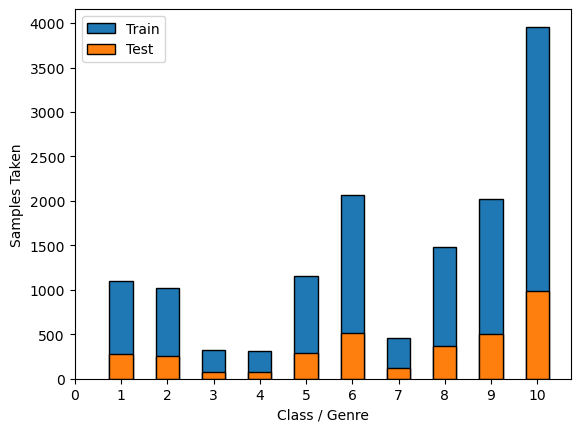

In [10]:
#Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

#Print the shapes of each set
print(f'X_train {X_train.shape}')
print(f'y_train {y_train.shape}')
print(f'X_test {X_test.shape}')
print(f'y_test {y_test.shape}')

#Create the bars for the histogram
plt.hist(y_train, bins=np.arange(0.5, 11.5, 1), rwidth = 0.5, label='Train', edgecolor='black')
plt.hist(y_test, bins=np.arange(0.5, 11.5, 1), rwidth = 0.5, label='Test', edgecolor='black')

#Show integers in the x axis accordingly
plt.xticks(np.arange(0, 11, 1))

#Labels
plt.ylabel('Samples Taken')
plt.xlabel('Class / Genre')

plt.legend()
plt.show()

The `train_test_split` separates our dataframe into training sets and test sets with an 80:20 ratio respectively. From the histogram, we can compare the distribution of class labels between the training set and the test set. This graph helps in understanding the representativeness of the data in both training and test sets and ensures that both sets have similar distributions of class labels.

Although there is an evident imbalance of samples between classes, we will handle that later with oversampling and undersampling.

## 4.1 Multinomial Logistic Regression using SGD

To perform multinomial logistic regression, we must first take from `sklearn`'s `SGDClassifier` to create a logistic regression model.

### Instantiating the classifier

Lets instantiate an `SGDClassifier` object, setting the following hyperparameters:
- Loss function: 'log_loss'
- Initial learning rate: 0.005
- Learning rate: 'constant'
- Random state: random_state
- Verbose: 0

In [11]:
SGDModel = SGDClassifier(
    loss = 'log_loss',
    eta0 = 0.005,
    learning_rate = 'constant', 
    random_state = random_state,
    verbose = 0)

Now that we have our classifier, let us train the model using the `fit` function from `sklearn`.

In [12]:
SGDModel.fit(X_train, y_train)

SGDClassifier(eta0=0.005, learning_rate='constant', loss='log_loss',
              random_state=42)

After training, we'll use the `get_Score` function that was defined earlier to determine how precise our machine is.

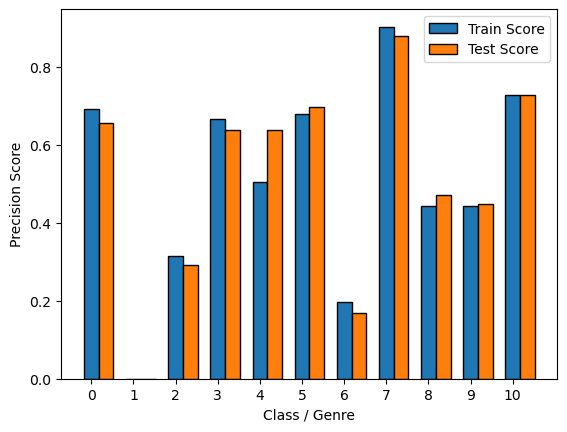

Train Avg Precision : 0.5057
Test Avg Precision : 0.5101


In [13]:
scores_SGD = get_Score(SGDModel, X_train, X_test, y_train, y_test)

In [14]:
accuracy_SGD = get_Accuracy(SGDModel, X_train, X_test, y_train, y_test)

Train Accuracy : 0.4914
Test Accuracy : 0.4911


The histogram shows that our machine learning model demonstrates varying levels of precision among the different genres. Some of the genres are classified with a high precision score, while some would have significantly lower scores. Notably, we can see that the precision scores on the test data would occasionally surpass those on the training data, which suggests potential overfitting. This implies that while the model performs well on the specific training examples, it may not generalize as effectively.

## 4.2 Multinomial Logistic Regression using Mini-Batch GD

Given that our attempts of performing Stochastic Gradient Descent have yielded below average precision results, we can attempt to train our machine using **Mini-Batch Gradient Descent** for more computational efficiency and stable convergence.

In [15]:
from sklearn.linear_model import SGDClassifier 

In [16]:
MBGDModel = SGDClassifier(
    loss = 'log_loss',
    eta0 = 0.005,
    learning_rate = 'constant', 
    random_state = random_state,
    verbose = 0)

Import the `MiniBatch.py` file containing similar contents to the `data_loader.py` used in other notebooks.

In [17]:
from MiniBatch import MiniBatch

Given that the `MiniBatch` is centered around using **NumPy Arrays**, we alter the contents of the code to handle `Pandas`' dataframes, replacing direct indexing with `.iloc`.

Then, instantiate a `MiniBatch` and pass the `X` and `y` train sets, and a `batch_size` of `64` for the parameters.

In [18]:
MiniBatch = MiniBatch(X_train, y_train, 64)

Now using **Mini-Batch Gradient Descent**, we will train our model.

In [19]:
#Variables
epoch        = 0
maxEpochs    = 300
previousLoss = 0

isConverged  = False
labels       = np.unique(y_train)

while epoch < maxEpochs and isConverged is not True:
    loss = 0
    
    X_batch, y_batch = MiniBatch.get_batch()

    for X, y in zip(X_batch, y_batch):
        MBGDModel.partial_fit(X, y, classes=labels)
        
        y_pred = MBGDModel.predict_proba(X_train)
        loss += log_loss(y_train, y_pred)
        
    print('Epoch:', epoch + 1, '\tLoss:', (loss / len(X_batch)))
    
    if abs(previousLoss - loss) < 0.05:
        isConverged = True
    else:
        previousLoss = loss
        epoch += 1

Epoch: 1 	Loss: 1.6684512519969268
Epoch: 2 	Loss: 1.473440238833201
Epoch: 3 	Loss: 1.4399041361158962
Epoch: 4 	Loss: 1.4261603133533214
Epoch: 5 	Loss: 1.417819167385269
Epoch: 6 	Loss: 1.412278418960135
Epoch: 7 	Loss: 1.408477709172061
Epoch: 8 	Loss: 1.4058904327731778
Epoch: 9 	Loss: 1.4035378207868883
Epoch: 10 	Loss: 1.4019577262102452
Epoch: 11 	Loss: 1.3991713294978643
Epoch: 12 	Loss: 1.3980933710503065
Epoch: 13 	Loss: 1.3979945277137031


We can see that our model has converged in just a few epochs with a significantly low decrease in loss for each. This can be resolved by further hyperparameter tuning to achieve a higher precision score.

Lets visualize the precision score after our model was trained via **Mini-Batch Gradient Descent** using the `get_Score` function.

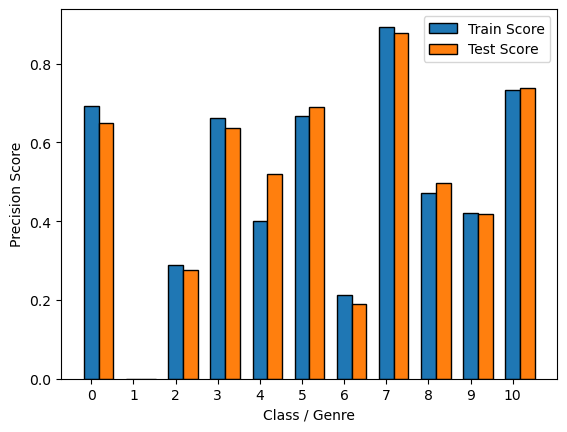

Train Avg Precision : 0.4946
Test Avg Precision : 0.4992


In [20]:
scores_MBGD = get_Score(MBGDModel, X_train, X_test, y_train, y_test)

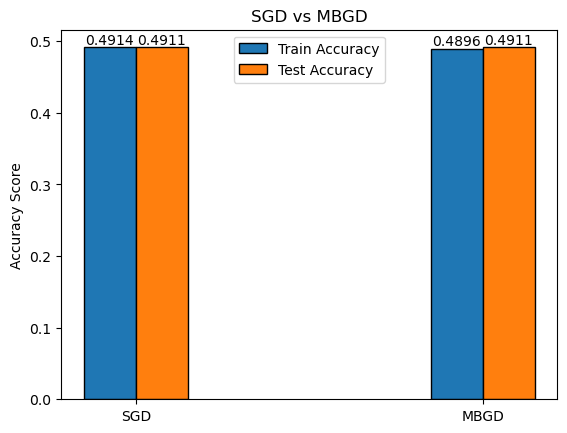

SGD Train Accuracy: 0.4914
SGD Test Accuracy: 0.4911
MBGD Train Accuracy: 0.4896
MBGD Test Accuracy: 0.4911


In [21]:
accuracy_MBGD = get_Accuracy(MBGDModel, X_train, X_test, y_train, y_test, verbose = 0)
compare_Accuracies(accuracy_SGD, accuracy_MBGD, labels=('SGD', 'MBGD'), title='SGD vs MBGD')

Given the precision and accuracy scores shown by the graph, the **Mini-Batch Gradient Descent** has performed somewhat poorer in comparison to simply fitting with **Stochastic Gradient Descent**. As mentioned earlier, this is likely due to our hyperparameters, causing our classifier to become noisy yielding similar precision and accuracy results..

Let us visualize the difference in precision between the two in another histogram.

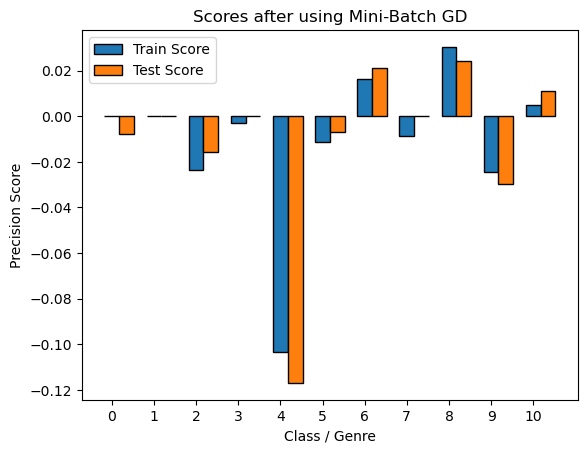

In [22]:
graph_Scores(np.array(scores_MBGD) - np.array(scores_SGD), 'Scores after using Mini-Batch GD')

## 4.3 Feature Selection

To attempt to improve the performance of our model, we will perform `feature selection` to make the model more streamlined and effective by directing its focus only on the features that provide more meaningful or important information for predictions.

### Manual feature selection

Let us try to gauge the importance of each feature in the dataframe by retrieving the coefficients or weights of each feature in our `SGDModel`. Then graphing these accordingly in a histogram.

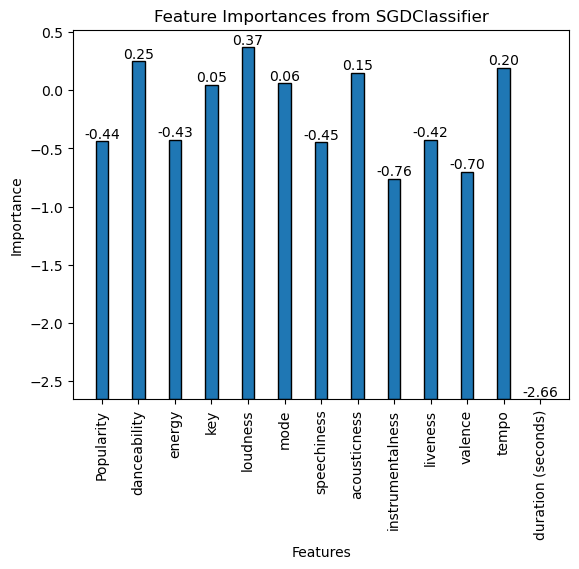

In [23]:
# Retrieve the coefficients from our SGD model
feature_importance = SGDModel.coef_[0]

# Match coefficients with feature names
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Convert the feature importance dictionary to two lists for plotting
features = list(feature_importance_dict.keys())
importances = list(feature_importance_dict.values())

# Find the minimum value of the importances
min_importance = min(importances)

# Makes the bars start from the minimum importance value
adjusted_importances = [importance - min_importance for importance in importances]

# Plot the feature importances as a bar chart
bars = plt.bar(features, adjusted_importances, width=0.35, edgecolor='black', bottom=min_importance)

# Add text labels above each bar
for bar, importance in zip(bars, importances):
    height = bar.get_height() + min_importance
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{importance:.2f}', ha='center', va='bottom')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from SGDClassifier')
plt.xticks(rotation=90)

plt.show()

As seen from the histogram, the features with the least relevance to our model is `duration(seconds)`, `instrumentalness`, `valence`, and `mode` respectively. We will drop these features and see if it makes a significant difference in comparison to the previous fits using the `SGDClassifier`.

In [24]:
low_imp = X_train.columns.drop(['duration (seconds)', 'instrumentalness', 'valence', 'mode'])

#Instantiate another SGDClassifier
FS_SGDModel = SGDClassifier(
    loss = 'log_loss',
    eta0 = 0.005,
    learning_rate = 'constant', 
    random_state = random_state,
    verbose = 0)

#Train the model only with the low-importance features
FS_SGDModel.fit(X_train[low_imp], y_train)

SGDClassifier(eta0=0.005, learning_rate='constant', loss='log_loss',
              random_state=42)

Now we compare the precision of our model when using all of its features to using the low-importance features.

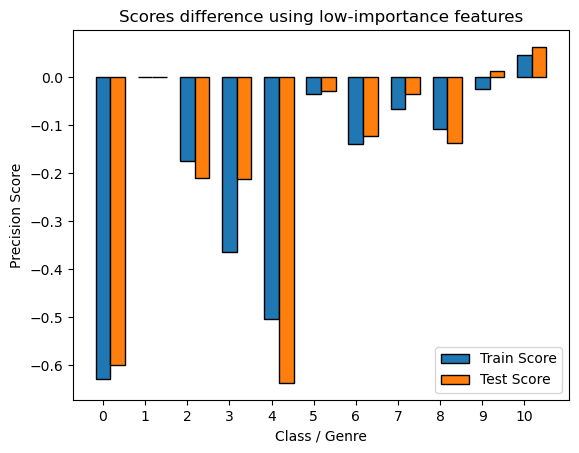

In [25]:
#Retrieve the precision score from the low-importance features
scores_FS = get_Score(FS_SGDModel, X_train[low_imp], X_test[low_imp], y_train, y_test, verbose = 0)

#Graph the score difference between basic SGD and SGD with the low-importance features
graph_Scores(np.array(scores_FS) - np.array(scores_SGD), 'Scores difference using low-importance features')

As we can see in the histogram, the performance of our model has plumetted from using only the low-importance features, indicating that we *may* receive more favorable results should we drop them. Let us instantiate another `SGDClassifier` class without using the said features.

In [26]:
included_ft = X_train.columns.drop([
              'Popularity', 'danceability', 'energy', 
              'key', 'loudness', 'speechiness', 
              'acousticness', 'liveness', 'tempo'])

#Instantiate another SGDClassifier
FS_SGDModel = SGDClassifier(
    loss = 'log_loss',
    eta0 = 0.005,
    learning_rate = 'constant', 
    random_state = random_state,
    verbose = 0)

#Train the model with the dropped features
FS_SGDModel.fit(X_train[included_ft], y_train)

SGDClassifier(eta0=0.005, learning_rate='constant', loss='log_loss',
              random_state=42)

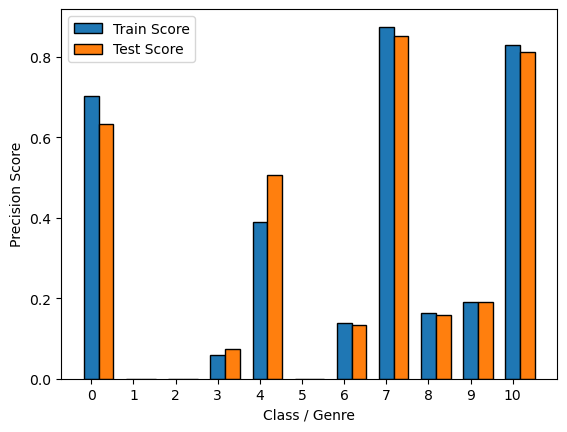

Train Avg Precision : 0.3041
Test Avg Precision : 0.3055


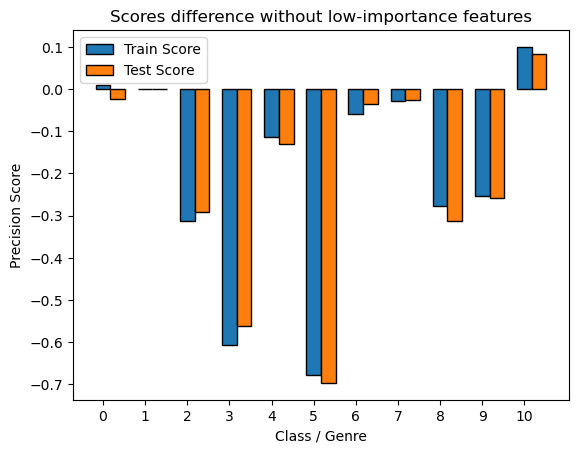

In [27]:
#Retrieve the precision score from the low-importance features
scores_FS = get_Score(FS_SGDModel, X_train[included_ft], X_test[included_ft], y_train, y_test, verbose = 1)

#Graph the score difference between basic SGD and SGD with the low-importance features
graph_Scores(np.array(scores_FS) - np.array(scores_SGD), 'Scores difference without low-importance features')

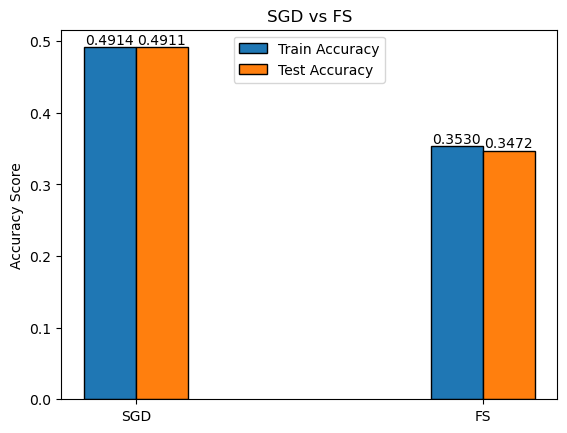

SGD Train Accuracy: 0.4914
SGD Test Accuracy: 0.4911
FS Train Accuracy: 0.3530
FS Test Accuracy: 0.3472


In [28]:
accuracy_FS = get_Accuracy(FS_SGDModel, X_train[included_ft], X_test[included_ft], y_train, y_test, verbose = 0)
compare_Accuracies(accuracy_SGD, accuracy_FS, labels=('SGD', 'FS'), title = 'SGD vs FS')

It seems that our model still performs poorly in comparison to our standard SGD fitting. This suggests that despite some features being less important than others, they may contribute significantly towards other features, and its removal could disrupt their interaction, leading to less favorable results. Let us attempt automated feature selection through `sklearn`'s library to perform it for us.

## 4.4 Cross Validation and Multivariate Feature Selection

For our other feature selection method, we will use **Multivariate Feature Selection** for its capacity to retain interactions between features. Further, we will perform cross-validation to ensure our model generalizes well to newer data presented to it. To perform this, we will use the `RFECV` method from the `sklearn` library.

Import `RFECV`, and `Pipeline`.

In [29]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

Instantiate an `SGDClassifier`, and set up the `RFECV`.

In [30]:
#Instantiate an SGDClassifier with similar parameters
MFS_Classifier = SGDClassifier(
    loss = 'log_loss',
    eta0 = 0.005,
    learning_rate = 'constant', 
    random_state = random_state,
    verbose = 0)

#Set up the RFECV with a 5-fold Cross validation, and precision as our metric
MFS_Pre_rfecv = RFECV(
    estimator = MFS_Classifier, 
    step = 1, 
    scoring = make_scorer(precision_score, average='weighted', zero_division = 0)) #Disable zero division

#And another one with accuracy as the metric
FS_Acc_rfecv = RFECV(
    estimator = MFS_Classifier, 
    step = 1, 
    scoring = 'accuracy')

#Create two pipelines with their respective RFECVs
MFS_Pre_pipeline = Pipeline([
    ('rfecv', MFS_Pre_rfecv)])

MFS_Acc_pipeline = Pipeline([
    ('rfecv', FS_Acc_rfecv)])

In this block, we set up the `RFECV`, otherwise known as the **Recursive Feature Elimination with Cross-Validation**, which is a process that recursively removes the least important features and evaluates the model's performance through cross-validation using `StratifiedKFold`, its default parameter for `cv`, which ensures that each fold (5 by default) of the cross-validation splits remain the same proportion of each class as the original dataset.

Train the models accordingly.

In [31]:
MFS_Pre_pipeline.fit(X_train, y_train)
MFS_Acc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rfecv',
                 RFECV(estimator=SGDClassifier(eta0=0.005,
                                               learning_rate='constant',
                                               loss='log_loss',
                                               random_state=42),
                       scoring='accuracy'))])

Graph the score difference of our data in contrast to standard SGD.

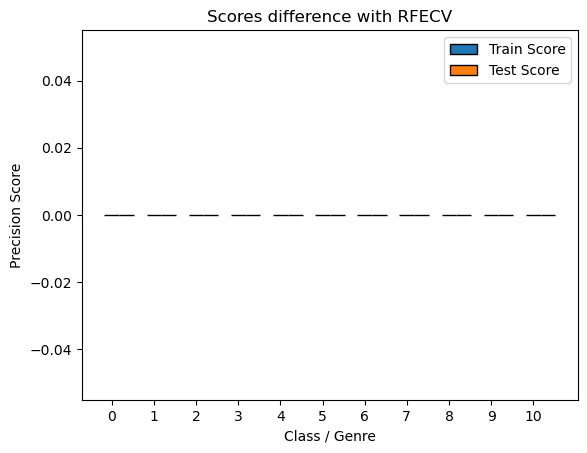

In [32]:
scores_MFS = get_Score(MFS_Pre_pipeline, X_train, X_test, y_train, y_test, verbose = 0)
graph_Scores(np.array(scores_MFS) - np.array(scores_SGD), 'Scores difference with RFECV')

Train Accuracy : 0.4914
Test Accuracy : 0.4911


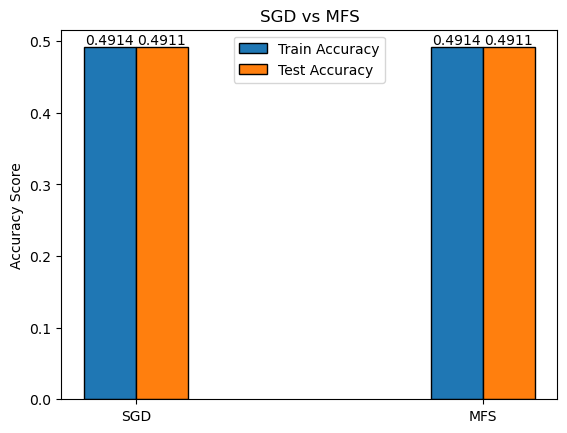

SGD Train Accuracy: 0.4914
SGD Test Accuracy: 0.4911
MFS Train Accuracy: 0.4914
MFS Test Accuracy: 0.4911


In [33]:
accuracy_MFS = get_Accuracy(MFS_Acc_pipeline, X_train, X_test, y_train, y_test)
compare_Accuracies(accuracy_SGD, accuracy_MFS, labels=('SGD', 'MFS'), title = 'SGD vs MFS')

The histogram reveals that our feature elimination and cross validation processes had no changes to our precision and accuracy scores, indicating that the initial feature set is already optimal and none should be removed. Given this, we may completely omit `RFECV` and the creation of a `Pipeline` for the remainder of our testing.

## 4.5 Regularization and hyperparameter tuning

To tune our hyperparameters and determine the optimal set for our model, we can perform techniques such as **Grid Search**, **Random Search**, and so on. In attempts to improve our model further, let us try to tune our parameters and regularization strength using `RandomizedSearchCV` from `sklearn` first, as our dataset is fairly large and using `GridSearchCV` would take an immense amount of processing time.

Import `RandomizedSearchCV` and `StratifiedKFold` from `sklearn`.

In [34]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

Define the parameter distribution that will be used by `RandomizedSearchCV`.

In [35]:
#Initialize our parameters
param_distributions = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01],  # Regularization intensity
    'eta0': [0.001, 0.005, 0.01, 0.05],       # Learning rate
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], # Learning Schedule
}

Instantiate another `SGDClassifier` with parameters similar to previous iterations.

In [36]:
#Instantiate an SGDClassifier with similar parameters
RSClassifier = SGDClassifier(
    loss = 'log_loss',
    eta0 = 0.005,
    learning_rate = 'constant', 
    random_state = random_state,
    verbose = 0)

Create two `RandomizedSearchCV` instances with the following parameters:
- estimator:           RSClassifier
- param_distributions: param_distributions
- n_iter:              64
- scoring:             make_scorer(precision_score, average = 'weighted', zero_division = 0)) **OR** 'accuracy'
- cv:                  StratifiedKFold(5) (Default)
- random_state:        random_state
- n_jobs:              -1

In [37]:
RandomSearch_pre = RandomizedSearchCV(
    estimator = RSClassifier, 
    param_distributions = param_distributions, 
    n_iter = 64, 
    scoring = make_scorer(precision_score, average = 'weighted', zero_division = 0),
    random_state = random_state,
    verbose = 1,
    n_jobs = -1)

RandomSearch_acc = RandomizedSearchCV(
    estimator = RSClassifier, 
    param_distributions = param_distributions, 
    n_iter = 64, 
    scoring = 'accuracy',
    random_state = random_state,
    verbose = 1,
    n_jobs = -1)

Train the model accordingly.

In [38]:
RandomSearch_pre.fit(X_train, y_train)
RandomSearch_acc.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits


RandomizedSearchCV(estimator=SGDClassifier(eta0=0.005, learning_rate='constant',
                                           loss='log_loss', random_state=42),
                   n_iter=64, n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive']},
                   random_state=42, scoring='accuracy', verbose=1)

Retrieve the best estimator from the `RandomizedSearchCV`.

In [39]:
best_model_pre = RandomSearch_pre.best_estimator_
best_model_acc = RandomSearch_acc.best_estimator_

Graph the score difference of our data in contrast to our manual input RFECV scores.

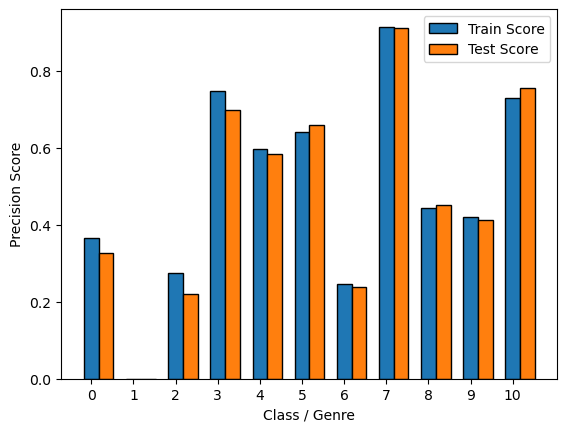

Train Avg Precision : 0.4897
Test Avg Precision : 0.4787


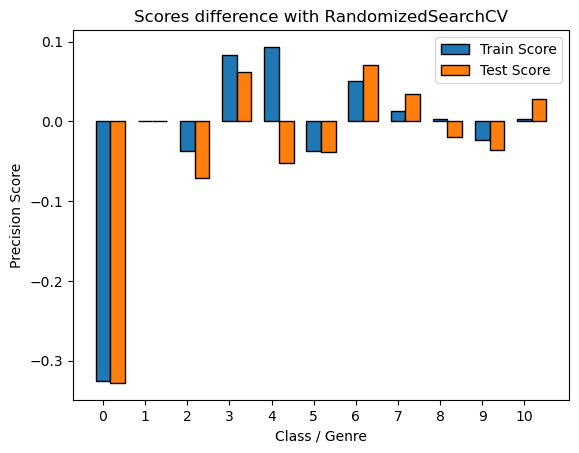

In [40]:
# Get scores for the best model
scores_RS = get_Score(best_model_pre, X_train, X_test, y_train, y_test, verbose = 1)

# Plot the scores difference
graph_Scores(np.array(scores_RS) - np.array(scores_SGD), 'Scores difference with RandomizedSearchCV')

Train Accuracy : 0.4925
Test Accuracy : 0.4928


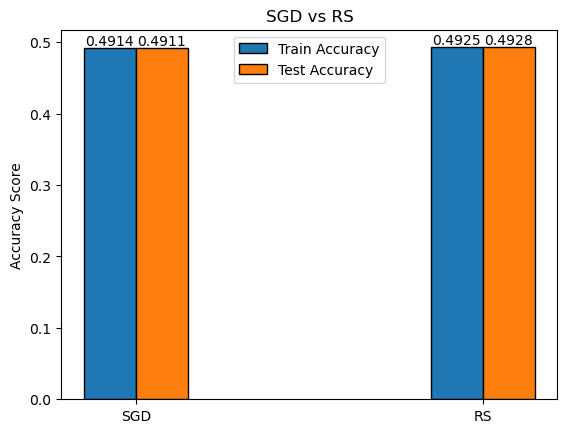

SGD Train Accuracy: 0.4914
SGD Test Accuracy: 0.4911
RS Train Accuracy: 0.4925
RS Test Accuracy: 0.4928


In [41]:
accuracy_RS = get_Accuracy(best_model_acc, X_train, X_test, y_train, y_test)
compare_Accuracies(accuracy_SGD, accuracy_RS, labels=('SGD', 'RS'), title = 'SGD vs RS')

It appears that our precision score has gone even lower despite our attempts to retrieve the most optimal parameters for our logistic regression model. This could be due to `RandomizedSearchCV` lack of coverage of the entire space, potentially missing more optimal hyperparameters. Let us print the parameters it perceived as the most optimal.

In [42]:
print(RandomSearch_pre.best_params_)
print(RandomSearch_acc.best_params_)

{'learning_rate': 'optimal', 'eta0': 0.001, 'alpha': 0.0001}
{'learning_rate': 'adaptive', 'eta0': 0.05, 'alpha': 1e-05}


In comparison to our previous `SGDClassifier` fitting without the implementation of the `RandomizedSearchCV`, the regularization intensity `alpha` that was selected was **0.01**. A larger regularization value in comparison to the default parameter of **0.0001**.

Given that our attempt to tune our hyperparameters and regularization strength have been suboptimal with the use of `RandomizedSearchCV`, let us now attempt to use `GridSearchCV`. Despite its farily long processing time, its capacity to exhaustively search over the hyperparameter space can give us a higher likelihood to retrieve the true optimal hyperparameters.

Import `GridSearchCV` from `sklearn`.

In [43]:
from sklearn.model_selection import GridSearchCV

Define the parameter grid that will be used by `GridSearchCV`.

In [44]:
param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01],  # Regularization intensity
    'eta0': [0.001, 0.005, 0.01, 0.05],       # Learning rate
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], # Learning schedule
}

Instantiate another `SGDClassifier`.

In [45]:
#Create another SGDClassifier
GSClassifier = SGDClassifier(
    loss = 'log_loss',
    eta0 = 0.005,
    learning_rate = 'constant', 
    random_state = random_state,
    verbose = 0)

Create the `GridSearchCV` instance with the following parameters:
- estimator:           GSClassifier
- param_grid: param_grid
- n_iter:              64
- scoring:             make_scorer(precision_score, average = 'weighted', zero_division = 0)) **OR** 'accuracy'
- cv:                  StratifiedKFold(5) (Default)
- random_state:        random_state
- n_jobs:              -1

In [46]:
GridSearch_pre = GridSearchCV(
    estimator = GSClassifier,
    param_grid = param_grid,
    scoring = make_scorer(precision_score, average='weighted', zero_division=0),
    cv = StratifiedKFold(5),  # 5-fold cross-validation
    n_jobs = -1,
    verbose = 1
)

GridSearch_acc = GridSearchCV(
    estimator = GSClassifier,
    param_grid = param_grid,
    scoring = 'accuracy',  # Use accuracy as the scoring metric
    cv = StratifiedKFold(5),  # 5-fold cross-validation
    n_jobs = -1,
    verbose = 1
)

Train the models accordingly.

In [47]:
GridSearch_pre.fit(X_train, y_train)
GridSearch_acc.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SGDClassifier(eta0=0.005, learning_rate='constant',
                                     loss='log_loss', random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01],
                         'eta0': [0.001, 0.005, 0.01, 0.05],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive']},
             scoring='accuracy', verbose=1)

Retrieve the best models from the `GridSearchCV` and then plot the graphs for precision and accuracy.

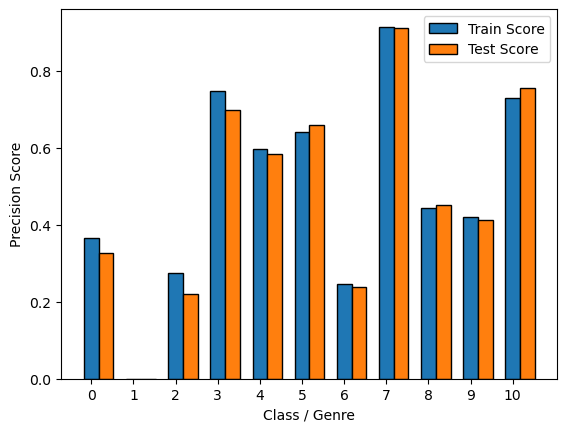

Train Avg Precision : 0.4897
Test Avg Precision : 0.4787


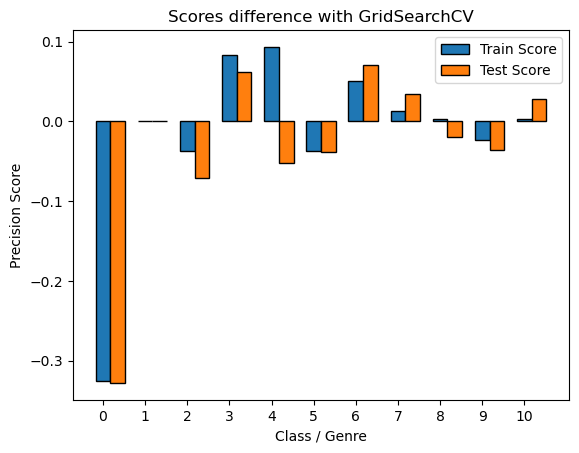

In [48]:
# Retrieve the best model
best_model_pre = GridSearch_pre.best_estimator_
best_model_acc = GridSearch_acc.best_estimator_

# Get scores for the best model
scores_GS = get_Score(best_model_pre, X_train, X_test, y_train, y_test, verbose = 1)

# Plot the scores difference
graph_Scores(np.array(scores_GS) - np.array(scores_SGD), 'Scores difference with GridSearchCV')

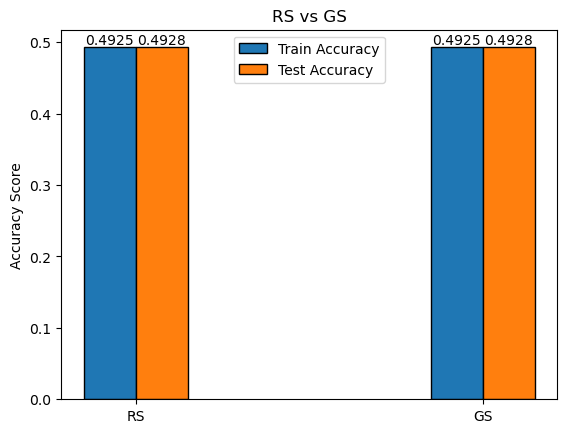

RS Train Accuracy: 0.4925
RS Test Accuracy: 0.4928
GS Train Accuracy: 0.4925
GS Test Accuracy: 0.4928


In [49]:
accuracy_GS = get_Accuracy(best_model_acc, X_train, X_test, y_train, y_test, verbose = 0)
compare_Accuracies(accuracy_RS, accuracy_GS, labels=('RS', 'GS'), title = 'RS vs GS')

Oddly enough, our `GridSearchCV` has provided a similar output to our `RandomizedSearchCV`. Though it is an unusual occurrence, as it is an exhaustive search for all combinations of hyperparameters set within the grid, we cannot rule out the possibility of error from the machine. 

Let us print the parameters once more to verify that they are one and the same.

In [50]:
print(GridSearch_pre.best_params_)
print(GridSearch_acc.best_params_)

{'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'optimal'}
{'alpha': 1e-05, 'eta0': 0.05, 'learning_rate': 'adaptive'}


## 4.6 Oversampling and Undersampling

In [51]:
from sklearn.utils import resample

Combine the training data into a single dataframe using `Pandas` `concat()` function.

In [52]:
# Combine the training data into a single dataframe for easy manipulation
Combined_Data = pd.concat([X_train, y_train], axis = 1)

Find the class with the maximum amount of samples among all classes using the `max()` function and assign it to `max_size`. This will represent the largest class in the dataframe.

In [53]:
# Initialize the maximum size for all classes in the dataframe
max_size = Combined_Data['Class'].value_counts().max()

Initialize a list with the original data `Combined_Data`.

In [54]:
# Create a list with the concatenated data
Orig_Data = [Combined_Data]

Iterate over each class and their corresponding samples and perform oversampling, and add the oversampled data of the current class to the list `Orig_Data`.

In [55]:
# Perform oversampling
for class_index, group in Combined_Data.groupby('Class'):
    Orig_Data.append(group.sample(max_size - len(group), replace=True, random_state=random_state))

Concatenate all the dataframes in the `Orig_Data` into a single dataframe named `OS_train_data`.

In [56]:
# Concat into a single dataframe
OS_train_data = pd.concat(Orig_Data)

Separate the features and the target classes once more.

In [57]:
# Separate the features and the target
X_train_OS = OS_train_data.drop('Class', axis = 1)
y_train_OS = OS_train_data['Class']

Now we instantiate two `SGDClassifiers` with the *best* parameters we've obtained via `GridSearchCV`.

In [58]:
OS_Classifier_pre = SGDClassifier(
    loss = 'log_loss',
    alpha = 0.0001,
    eta0 = 0.001,
    learning_rate = 'optimal', 
    random_state = random_state,
    verbose = 0)

OS_Classifier_acc = SGDClassifier(
    loss = 'log_loss',
    alpha = 1e-05,
    eta0 = 0.05,
    learning_rate = 'adaptive', 
    random_state = random_state,
    verbose = 0)

Now we can fit our models with the new training sets `X_train_OS` and `y_train_OS`.

In [59]:
# Fit the models to the oversampled training data
OS_Classifier_pre.fit(X_train_OS, y_train_OS)
OS_Classifier_acc.fit(X_train_OS, y_train_OS)

SGDClassifier(alpha=1e-05, eta0=0.05, learning_rate='adaptive', loss='log_loss',
              random_state=42)

Graph the precision score of our model with the oversampled data using `graph_Scores`.

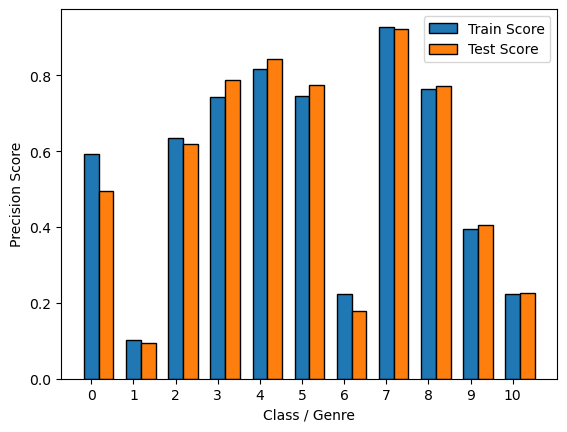

Train Avg Precision : 0.5612
Test Avg Precision : 0.5565


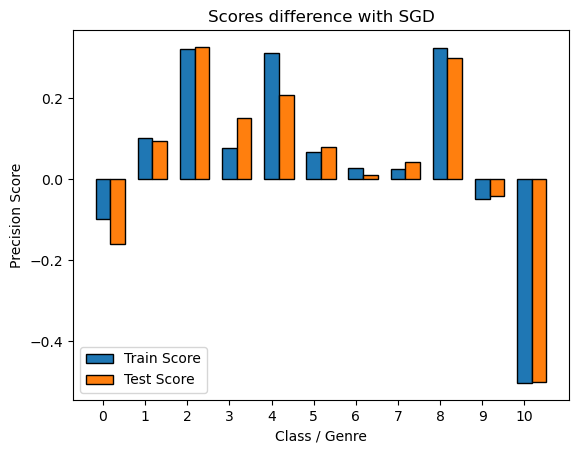

In [60]:
scores_OS = get_Score(OS_Classifier_pre, X_train, X_test, y_train, y_test, verbose = 1)
graph_Scores(np.array(scores_OS) - np.array(scores_SGD), 'Scores difference with SGD')

We've finally achieved a higher precision score for our model in comparison to basic fitting using the `SGDClassifier`. Now let us visualize the accuracy score of the model after oversampling using the `get_Accuracy` function.

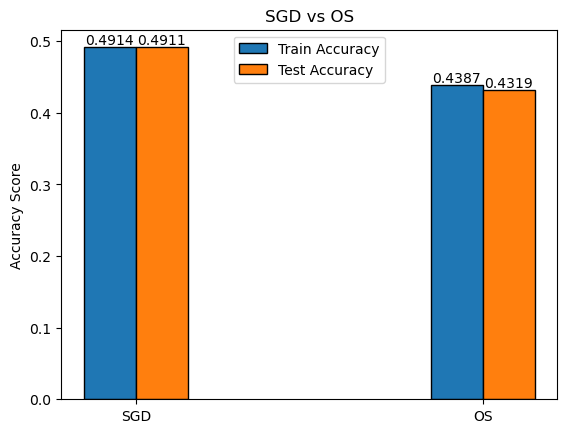

SGD Train Accuracy: 0.4914
SGD Test Accuracy: 0.4911
OS Train Accuracy: 0.4387
OS Test Accuracy: 0.4319


In [61]:
accuracy_OS = get_Accuracy(OS_Classifier_acc, X_train, X_test, y_train, y_test, verbose = 0)
compare_Accuracies(accuracy_SGD, accuracy_OS, labels=('SGD', 'OS'), title = 'SGD vs OS')

Though our accuracy score decreased despite the increase in precision score, this is to be expected. The nature of precision is the ratio of **True Positive** the sum of **True and False Positive**, so in the context of imbalanced data, oversampling the minority classes will help the `SGDClassifier` identify more instances in the minority class more correctly. Reducing the number of false positives and negatives for these classes.

On the other hand, accuracy is a ratio between **Correct Classifications** to the **Total Number of Instances**, so when the data is imbalanced, the accuracy score may be misleadingly high because the `SGDClassifier` may perform well on the majority class while neglecting the minority classes.

A similar trend may be visualized as well for undersampling as well, but it may performer poorer as the model is given lesser data to learn from. Let us perform undersampling with a process similar to how we performed oversampling and compare.

In [62]:
# Combine the training data into a single dataframe for easy manipulation
Combined_Data = pd.concat([X_train, y_train], axis = 1)

# This time, initialize the MINIMUM size for all classes in the dataframe
min_size = Combined_Data['Class'].value_counts().min()

# Create a list with the concatenated data
Orig_Data = [Combined_Data]

# Perform oversampling
for class_index, group in Combined_Data.groupby('Class'):
    Orig_Data.append(group.sample(min_size, replace=False, random_state=random_state))
    
# Concat into a single dataframe
US_train_data = pd.concat(Orig_Data)

# Separate the features and the target
X_train_US = US_train_data.drop('Class', axis = 1)
y_train_US = US_train_data['Class']

Create another set of models for undersampling for us to compare the difference to oversampling.

In [63]:
US_Classifier_pre = SGDClassifier(
    loss = 'log_loss',
    alpha = 0.0001,
    eta0 = 0.001,
    learning_rate = 'optimal', 
    random_state = random_state,
    verbose = 0)

US_Classifier_acc = SGDClassifier(
    loss = 'log_loss',
    alpha = 1e-05,
    eta0 = 0.05,
    learning_rate = 'adaptive', 
    random_state = random_state,
    verbose = 0)

Let us train the same models but this time with the undersampled training sets.

In [64]:
# Fit the models to the undersampled training data
US_Classifier_pre.fit(X_train_US, y_train_US)
US_Classifier_acc.fit(X_train_US, y_train_US)

SGDClassifier(alpha=1e-05, eta0=0.05, learning_rate='adaptive', loss='log_loss',
              random_state=42)

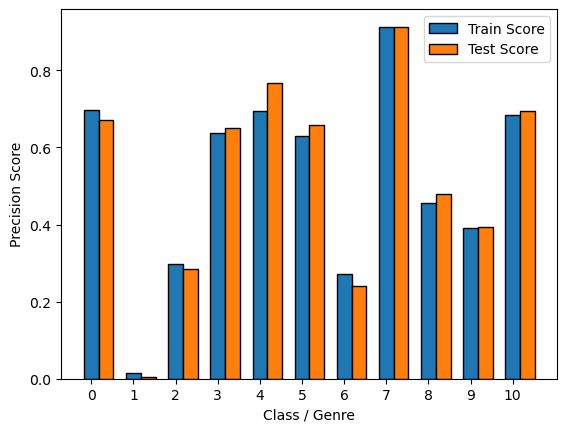

Train Avg Precision : 0.5169
Test Avg Precision : 0.5234


In [65]:
scores_US = get_Score(US_Classifier_pre, X_train, X_test, y_train, y_test, verbose = 1)

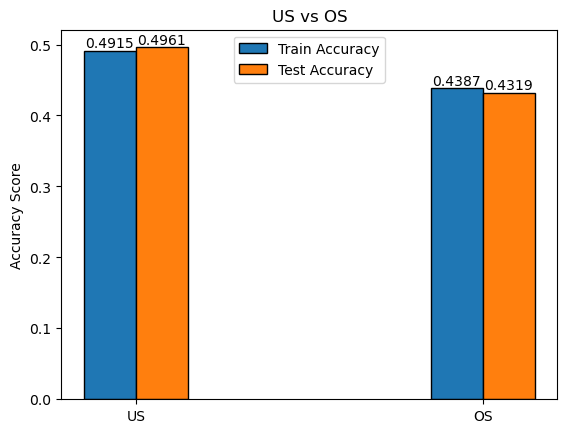

US Train Accuracy: 0.4915
US Test Accuracy: 0.4961
OS Train Accuracy: 0.4387
OS Test Accuracy: 0.4319


In [66]:
accuracy_US = get_Accuracy(US_Classifier_acc, X_train, X_test, y_train, y_test, verbose = 0)
compare_Accuracies(accuracy_US, accuracy_OS, labels=('US', 'OS'), title = 'US vs OS')

As predicted, our model has performed poorer on `accuracy_score`, but improved on the `precision_score`. This is likely due to the reduction of overall samples, limiting the model's ability to learn complex patterns from our list of features, but placing more importance on minority classes.

## 4.7 Summary

To summarize what we've learned in this notebook:

1. Given the subpar precision and accuracy results despite attempts to tune, Multinomial Logistic Regression may not be the best model for the dataset.
2. The Multinomial Logistic Regression model is not prone to overfitting nor underfitting given the dataset.
3. Mini-Batch Gradient Descent may tend to be noisy and may not differ by a drastic amount in comparison to Stochastic Gradient Descent. 
4. The features tend to interact with each other. Dropping them yields poorer results as seen in **SGD vs. FS**, where manual feature dropping was done.
5. `RFECV` and Multivariate Feature Selection were ineffective in improving precision and accuracy due to all faetures deemed essential.
6. `RandomizedSearchCV` and `GridSearchCV` can tend to miss optimal hyperparameter configurations despite being an exhaustive search.
7. Oversampling and undersampling can improve precision but decrease accuracy. Despite the adjustment for class imbalances, the scores remain subpar.

#### Best Scores:

Train Precision: Oversampling **~56%**

Test Precision: Oversampling **~55%**

Train Accuracy: RandomizedSearchCV & GridSearchCV **~49%** 

Test Accuracy:  RandomizedSearchCV & GridSearchCV **~49%**

#### Worst Scores:

Train Precision: Manual Feature Feature Selection **~30%**

Test Precision: Manual Feature Feature Selection **~30%**

Train Accuracy: Manual Feature Feature Selection **~35%**

Test Accuracy: Manual Feature Feature Selection **~34%**

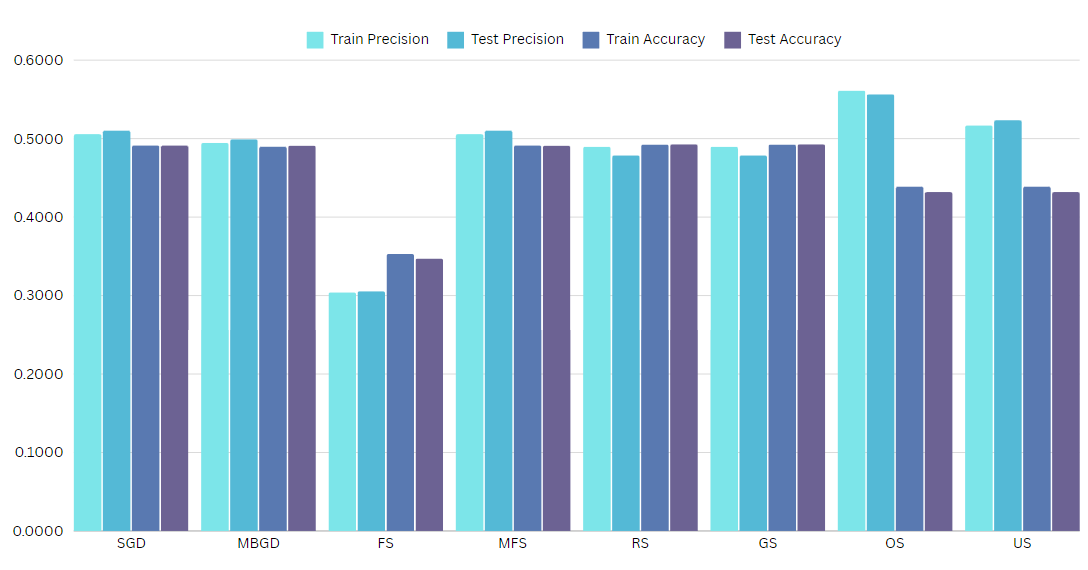